# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
number_of_cities=len(cities)
number_of_cities

608

In [4]:
cities

['yulara',
 'tsihombe',
 'ushuaia',
 'birao',
 'geraldton',
 'chapais',
 'atuona',
 'punta arenas',
 'butaritari',
 'oktyabrskoye',
 'jamestown',
 'kasongo-lunda',
 'clyde river',
 'mocuba',
 'taoudenni',
 'airai',
 'albany',
 'carnarvon',
 'georgetown',
 'yellowknife',
 'hihifo',
 'taolanaro',
 'tual',
 'mataura',
 'touros',
 'mahebourg',
 'tuktoyaktuk',
 'vila velha',
 'neepawa',
 'rocha',
 'alice springs',
 'rikitea',
 'vaini',
 'saskylakh',
 'bristol',
 'channel-port aux basques',
 'faanui',
 'bluff',
 'chokurdakh',
 'sterling',
 'avera',
 'ilulissat',
 'cape town',
 'henties bay',
 'paamiut',
 'trelleborg',
 'faya',
 'saint-pacome',
 'beihai',
 'chuy',
 'port elizabeth',
 'tura',
 'tuatapere',
 'yar-sale',
 'merauke',
 'champerico',
 'upernavik',
 'arraial do cabo',
 'jilmah',
 'tasiilaq',
 'amapa',
 'castro',
 'leningradskiy',
 'salinopolis',
 'mar del plata',
 'illoqqortoormiut',
 'pevek',
 'port keats',
 'dikson',
 'cabo san lucas',
 'port alfred',
 'tiksi',
 'bonthe',
 'ponta 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
def city_weather(city):  
    params={
        "q":city,
        "appid": weather_api_key,
        "units":"metric"
    }    

    base_url="http://api.openweathermap.org/data/2.5/weather"

    response=requests.get(base_url,params=params).json()
    
    return response

In [9]:
results=[]

for x in range(len(cities)): 
    try:
        print(f'Processing record {x} of {number_of_cities} | {cities[x]}')
        funtion_response=city_weather(cities[x])
        results.append(funtion_response)
    except:
        print(f'City {cities[x]} not found. Skipping...')    

Processing record 0 of 608 | yulara
Processing record 1 of 608 | tsihombe
Processing record 2 of 608 | ushuaia
Processing record 3 of 608 | birao
Processing record 4 of 608 | geraldton
Processing record 5 of 608 | chapais
Processing record 6 of 608 | atuona
Processing record 7 of 608 | punta arenas
Processing record 8 of 608 | butaritari
Processing record 9 of 608 | oktyabrskoye
Processing record 10 of 608 | jamestown
Processing record 11 of 608 | kasongo-lunda
Processing record 12 of 608 | clyde river
Processing record 13 of 608 | mocuba
Processing record 14 of 608 | taoudenni
Processing record 15 of 608 | airai
City airai not found. Skipping...
Processing record 16 of 608 | albany
Processing record 17 of 608 | carnarvon
Processing record 18 of 608 | georgetown
Processing record 19 of 608 | yellowknife
Processing record 20 of 608 | hihifo
Processing record 21 of 608 | taolanaro
Processing record 22 of 608 | tual
Processing record 23 of 608 | mataura
Processing record 24 of 608 | touro

Processing record 204 of 608 | hilo
Processing record 205 of 608 | san patricio
Processing record 206 of 608 | lomonosov
Processing record 207 of 608 | micheweni
Processing record 208 of 608 | batsfjord
Processing record 209 of 608 | carbonia
Processing record 210 of 608 | belushya guba
Processing record 211 of 608 | ostrovnoy
Processing record 212 of 608 | luganville
Processing record 213 of 608 | jasper
Processing record 214 of 608 | namibe
Processing record 215 of 608 | bonavista
Processing record 216 of 608 | sataua
Processing record 217 of 608 | dunhua
Processing record 218 of 608 | kaili
Processing record 219 of 608 | bethel
Processing record 220 of 608 | littleton
Processing record 221 of 608 | nhulunbuy
Processing record 222 of 608 | sinnamary
Processing record 223 of 608 | port macquarie
Processing record 224 of 608 | vestmannaeyjar
Processing record 225 of 608 | kieta
Processing record 226 of 608 | stryn
Processing record 227 of 608 | kimbe
Processing record 228 of 608 | conw

Processing record 409 of 608 | manama
Processing record 410 of 608 | pangkalanbuun
Processing record 411 of 608 | korla
Processing record 412 of 608 | mildura
Processing record 413 of 608 | katiola
Processing record 414 of 608 | zhigansk
Processing record 415 of 608 | alta floresta
Processing record 416 of 608 | pitimbu
Processing record 417 of 608 | pathein
Processing record 418 of 608 | solnechnyy
Processing record 419 of 608 | aboisso
Processing record 420 of 608 | paredon
Processing record 421 of 608 | zemio
Processing record 422 of 608 | hailey
Processing record 423 of 608 | uitenhage
Processing record 424 of 608 | pizarro
Processing record 425 of 608 | fortuna
Processing record 426 of 608 | cozumel
Processing record 427 of 608 | mahibadhoo
Processing record 428 of 608 | beitbridge
Processing record 429 of 608 | cidreira
Processing record 430 of 608 | maniitsoq
Processing record 431 of 608 | cherskiy
Processing record 432 of 608 | ouanaminthe
Processing record 433 of 608 | djambal

In [31]:
import pandas as pd

city=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]

for x in range(len(results)):
    try:
        city.append(results[x]['name'])
        cloudiness.append(results[x]["clouds"]["all"])
        country.append(results[x]["sys"]["country"])
        date.append(results[x]["dt"])
        humidity.append(results[x]["main"]["humidity"])
        lat.append(results[x]["coord"]["lat"])
        lng.append(results[x]["coord"]["lon"])
        max_temp.append(results[x]["main"]["temp_max"])
        wind_speed.append(results[x]["wind"]["speed"])
    except:
        continue
    
final_table=pd.DataFrame({
    "City":city,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Wind Speed":wind_speed
})
    
final_table

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Yulara,40,AU,1603508300,43,-25.24,130.99,21.00,3.60
1,Ushuaia,75,AR,1603508300,85,-54.80,-68.30,5.00,3.60
2,Birao,100,CF,1603508301,72,10.28,22.79,24.23,1.41
3,Geraldton,0,AU,1603508301,16,-28.77,114.60,31.00,5.10
4,Chapais,90,CA,1603508301,100,49.78,-74.85,1.00,4.10
...,...,...,...,...,...,...,...,...,...
550,Erenhot,0,CN,1603508447,41,43.65,111.98,8.94,3.61
551,Luwuk,8,ID,1603508448,59,-0.95,122.79,31.14,1.71
552,Gorgan,0,IR,1603508448,93,36.84,54.43,11.00,0.48
553,Biak,13,ID,1603508448,64,-0.91,122.88,29.93,1.43


In [ ]:
len(results)

In [42]:
results[-1]

{'coord': {'lon': 71.64, 'lat': 48.68},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': -3.47,
  'feels_like': -8,
  'temp_min': -3.47,
  'temp_max': -3.47,
  'pressure': 1031,
  'humidity': 90,
  'sea_level': 1031,
  'grnd_level': 970},
 'visibility': 10000,
 'wind': {'speed': 2.76, 'deg': 249},
 'clouds': {'all': 7},
 'dt': 1603508448,
 'sys': {'country': 'KZ', 'sunrise': 1603504043, 'sunset': 1603541254},
 'timezone': 21600,
 'id': 1526041,
 'name': 'Atasū',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [43]:
import os

path=r"C:\Users\Intel NUC\OneDrive\++Tec Data Analytics Bootcamp\HWKS\python-api-challenge\Instructions\output_data"

final_table.to_csv(os.path.join(path,r'cities.csv'),index=False)

In [44]:
final_table

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Yulara,40,AU,1603508300,43,-25.24,130.99,21.00,3.60
1,Ushuaia,75,AR,1603508300,85,-54.80,-68.30,5.00,3.60
2,Birao,100,CF,1603508301,72,10.28,22.79,24.23,1.41
3,Geraldton,0,AU,1603508301,16,-28.77,114.60,31.00,5.10
4,Chapais,90,CA,1603508301,100,49.78,-74.85,1.00,4.10
...,...,...,...,...,...,...,...,...,...
550,Erenhot,0,CN,1603508447,41,43.65,111.98,8.94,3.61
551,Luwuk,8,ID,1603508448,59,-0.95,122.79,31.14,1.71
552,Gorgan,0,IR,1603508448,93,36.84,54.43,11.00,0.48
553,Biak,13,ID,1603508448,64,-0.91,122.88,29.93,1.43


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.scatter(final_table["Lat"],final_table["Max Temp"])
ax1.set_title("City Temperature (C) vs. Latitude (23/10/2020)", fontsize=14)
ax1.set(xlabel='Latitude', ylabel='Max Temp (C)')

# xlabel("Latitude", fontsize=13)
# ax1.ylabel("Max Temp (C)", fontsize=13)
ax1.grid()
# ax1.savefig(os.path.join(path,r"Fig_jd.png"))
# ax1.show()

print(f"""

""")


ax2.scatter(final_table["Lat"],final_table["Max Temp"])
ax2.set_title("City Temperature (C) vs. Latitude (23/10/2020)", fontsize=14)
ax1.set(xlabel='Latitude', ylabel='Max Temp (C)')

# ax2.xlabel("Latitude", fontsize=13)
# ax2.ylabel("Max Temp (C)", fontsize=13)
ax2.grid()
# ax2.savefig(os.path.join(path,r"Fig_jd2.png"))
# ax2.show()

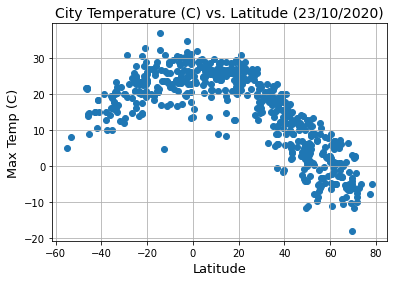

In [77]:
plt.scatter(final_table["Lat"],final_table["Max Temp"])
plt.title("City Temperature (C) vs. Latitude (23/10/2020)", fontsize=14)
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Max Temp (C)", fontsize=13)
plt.grid()
plt.savefig(os.path.join(path,r"Fig_jd.png"))
plt.show()

#### Latitude vs. Humidity Plot

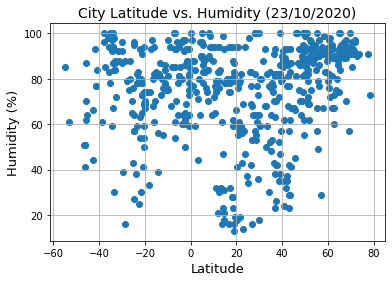

In [78]:
plt.scatter(final_table["Lat"],final_table["Humidity"])
plt.title("City Latitude vs. Humidity (23/10/2020)", fontsize=14)
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Humidity (%)", fontsize=13)
plt.grid()
plt.savefig(os.path.join(path,r"Fig_jd2.png"))
plt.show()

#### Latitude vs. Cloudiness Plot

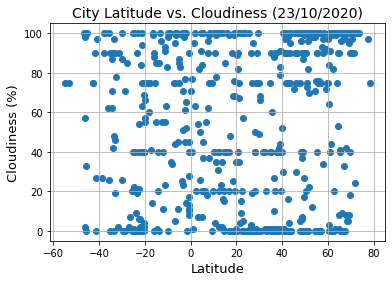

In [79]:
plt.scatter(final_table["Lat"],final_table["Cloudiness"])
plt.title("City Latitude vs. Cloudiness (23/10/2020)", fontsize=14)
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Cloudiness (%)", fontsize=13)
plt.grid()
plt.savefig(os.path.join(path,r"Fig_jd3.png"))
plt.show()

#### Latitude vs. Wind Speed Plot

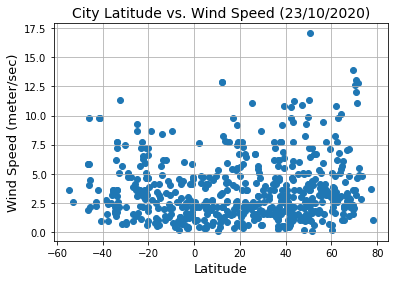

In [80]:
plt.scatter(final_table["Lat"],final_table["Wind Speed"])
plt.title("City Latitude vs. Wind Speed (23/10/2020)", fontsize=14)
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Wind Speed (meter/sec)", fontsize=13)
plt.grid()
plt.savefig(os.path.join(path,r"Fig_jd4.png"))
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression